# Analyze Sort-seq
Sort-seq library question 3: How many half sites equals full site expression?

This module analyzes sort-seq data and made Figure 5C and Figure 8S in Recio et al., 

Code written by PSR

In [1]:
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy 
import itertools
import seaborn as sns
import statannotations
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statannotations.Annotator import Annotator
from scipy import stats
from analyze_sig_hits_v2 import *
from analyze_sort_seq import *
from bioinfokit.analys import stat

In [27]:
def make_sns_boxplot(df, xvalue, yvalue, color1, color2, hue_value, output_file, xl, yl, wt_prmean, minimum, maximum):
    """ This function makes a boxplot"""
    plt.axhline(y = wt_prmean , color = color2, linestyle = ':')
    #plt.annotate("Average consensus sequence mean", size = 8, xy = (0, wt_prmean-1000))
    ax = sns.boxplot(x=xvalue, y=yvalue, data=df, hue = hue_value, palette= color1, showfliers = False)
    ax.set_ylim([minimum, maximum])
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    #plt.show()
    plt.savefig(output_file, bbox_inches='tight')
    
def make_compare_plot(df, xvalue, yvalue, color1, color2, hue_value, wt_prmean, output):
    """This function makes a barplot that compares the different types of mutations"""
    
    ax = sns.barplot(x= xvalue, y= yvalue, data=df, hue = hue_value, palette = color1)
    #plt.annotate("Average consensus sequence mean", size = 8, xy = (0, wt_prmean-1000))
    ax.set_ylim([0, 7500])



    ax.set_xlabel("Number of inserts")
    ax.set_ylabel("Relative Expression of Gal4p promoter")
    plt.axhline(y = wt_prmean , color = color2, linestyle = ':')
    plt.legend(frameon=True, loc=(1.02, 0.8), borderaxespad=0)
    plt.savefig(output,  bbox_inches='tight')

In [28]:
 def make_df_q3(df, pr_name):
    """This function makes a dataframe for mutant promoters with half sites inserted"""
    pr_q3 = df.loc[(df["Promoter"]== pr_name) & (df["Sequence_type"] == "insert_site")]
    pr_cg_q3 = df.loc[(df["Promoter"]==pr_name) & (df["Sequence_type"] == "insert_CG_control")]
    pr_ran3mer_q3 = df.loc[(df["Promoter"]== pr_name) & (df["Sequence_type"] == "insert_rand_3mer")]
    return pr_q3, pr_cg_q3, pr_ran3mer_q3


In [36]:
expression_file = "L4_gal4_anova_analysis.csv"
expression_file2 = "L4_leu3_anova.csv"
expression_file3 = "L4_tea1_anova.csv"
expression_file4 = "L4_yrm1_final.csv"


expression_ko_file3 = "L4_tea1_ko.csv"
expression_ko_file4 = "L4_yrm1_ko.csv"


filter1 = "Mpr20"
#filter2 = "control"

df = pd.read_csv(expression_file4, header= None)
df_ko = pd.read_csv(expression_ko_file4, header= None)
df = df.loc[(~df[1].str.contains(filter1))]#& (~df[1].str.contains(filter2))]
df_ko = df_ko.loc[(~df_ko[1].str.contains(filter1))& (~df_ko[1].str.contains(filter2))]
df.columns = ['Sequence_type', 'Promoter', 'insert', 'Expression']
df_ko.columns = ['Sequence_type', 'Promoter', 'insert', 'Expression']

In [38]:
df[df["Sequence_type"].str.contains("insert")]

,Sequence_type,Promoter,insert,Expression
352,insert_site,YRM1_control_Hsv2pr,1,1277.916
353,insert_site,YRM1_GIP3/ISU1pr_control,1,1374.415
354,insert_site,YRM1_Spo24pr_control,1,3745.892
355,insert_site,YRM1_control_Cax4pr,1,1303.732
356,insert_site,YRM1_control_Hsv2pr,3,1514.198
...,...,...,...,...
1511,insert_rand_3mer,YRM1_control_Cax4pr,0,1686.070
1512,insert_rand_3mer,YRM1_control_Hsv2pr,0,1166.386
1513,insert_rand_3mer,YRM1_GIP3/ISU1pr_control,0,1368.032
1514,insert_rand_3mer,YRM1_Spo24pr_control,0,1548.028


In [39]:
pr_q3 = df.loc[(df["Sequence_type"] == "insert_site")]

#up1 = pr_q3.loc[pr_q3["Promoter"] == "RUP1/SFL1pr"]

In [21]:
gal1_10 = pr_q3.loc[pr_q3["Promoter"] == "GAL1_10pr"]

In [22]:
#make_sns_boxplot(gal1_10, "insert", "Expression", "YlOrRd", "darkred", None, "q3_gal1_10_relative_box.pdf", "Number of Half Sites inserted", "", means[0],0, 17000)



In [40]:
pr_q3

,Sequence_type,Promoter,insert,Expression
352,insert_site,YRM1_control_Hsv2pr,1,1277.916
353,insert_site,YRM1_GIP3/ISU1pr_control,1,1374.415
354,insert_site,YRM1_Spo24pr_control,1,3745.892
355,insert_site,YRM1_control_Cax4pr,1,1303.732
356,insert_site,YRM1_control_Hsv2pr,3,1514.198
...,...,...,...,...
1455,insert_site,YRM1_control_Cax4pr,23,6409.907
1456,insert_site,YRM1_control_Hsv2pr,25,3656.431
1457,insert_site,YRM1_GIP3/ISU1pr_control,25,5556.804
1458,insert_site,YRM1_Spo24pr_control,25,6657.821


In [41]:
rup1.groupby(["insert"]).mean()

,Expression
insert,
1,1009.612356
3,985.215773
5,2016.862195
7,1932.259434
9,1221.585748
11,5227.338505
13,2508.482066
15,4321.074064
17,3948.253004


In [42]:
pr_names = pr_q3["Promoter"].tolist()
pr_names2 = list(set(pr_names))

In [43]:
pr_names2

['YRM1_control_Cax4pr',
 'YRM1_GIP3/ISU1pr_control',
 'YRM1_Spo24pr_control',
 'YRM1_control_Hsv2pr']

In [78]:
pr_names = ["Cax4pr", "Spo24pr", "Hsv2pr", "Gip3_Isu1pr"]

In [66]:
means = []

In [84]:

for wt_name in pr_names:
    #print(wt_name)
    wt_pr_combined = df.loc[(df["Sequence_type"].str.contains("WT"))& df["Promoter"].str.contains(wt_name) & ~df["Promoter"].str.contains("mut")]
    #print(wt_pr_combined)
    #print(wt_pr_combined["Expression"])
    means.append(wt_pr_combined["Expression"].mean())



In [88]:
import statistics
statistics.mean(means)

4047.14625

In [12]:
insert_site = []
insert_3mer = []
insert_CG = []
insert_site_ko = []
insert_3mer_ko = []
insert_CG_ko = []

In [17]:
for i in pr_names2: 
    a,b,c = make_df_q3(df, i)
    insert_site.append(a)
    insert_CG.append(b)
    insert_3mer.append(c)

In [18]:
insert_site[0]

,Sequence_type,Promoter,insert,Expression


In [342]:
insert_site_ko[0]["Expression"] = insert_site_ko[0]["Expression"].astype(float)
insert_site_ko[1]["Expression"] = insert_site_ko[1]["Expression"].astype(float)
insert_site_ko[2]["Expression"] = insert_site_ko[2]["Expression"].astype(float)
insert_site_ko[3]["Expression"] = insert_site_ko[3]["Expression"].astype(float)

/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [343]:
insert_site[0]["difference"] = insert_site[0]["Expression"]-insert_site_ko[0]["Expression"]
insert_site[1]["difference"] = insert_site[1]["Expression"]-insert_site_ko[1]["Expression"]
insert_site[2]["difference"] = insert_site[2]["Expression"]-insert_site_ko[2]["Expression"]
insert_site[3]["difference"] = insert_site[3]["Expression"]-insert_site_ko[3]["Expression"]




# insert_CG[0]["difference"] = insert_CG[0]["Expression"]-insert_CG_ko[0]["Expression"]
# insert_CG[1]["difference"] = insert_CG[1]["Expression"]-insert_CG_ko[1]["Expression"]

# insert_3mer[0]["difference"] = insert_3mer[0]["Expression"]-insert_3mer_ko[0]["Expression"]
# insert_3mer[1]["difference"] = insert_3mer[1]["Expression"]-insert_3mer_ko[1]["Expression"]

/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [111]:
wt_pr1 = df.loc[(df["Sequence_type"].str.contains("WT"))& df["Promoter"].str.contains(pr_names[0]) & ~df["Promoter"].str.contains("mut")]
wt_pr2 = df.loc[(df["Sequence_type"].str.contains("WT"))& df["Promoter"].str.contains(pr_names[1]) & ~df["Promoter"].str.contains("mut")]

In [349]:
insert_site[0]

,Sequence_type,Promoter,insert,Expression,difference
309,insert_site,TEA1_control_Isf1pr,1,1893,1209.059743
311,insert_site,TEA1_control_Isf1pr,3,1796,1189.460333
313,insert_site,TEA1_control_Isf1pr,5,1449,-29.360161
315,insert_site,TEA1_control_Isf1pr,7,2032,928.876386
317,insert_site,TEA1_control_Isf1pr,9,2668,1562.247461
319,insert_site,TEA1_control_Isf1pr,11,3890,1450.356243
321,insert_site,TEA1_control_Isf1pr,13,4126,2600.258083
323,insert_site,TEA1_control_Isf1pr,15,4479,3410.097976
325,insert_site,TEA1_control_Isf1pr,17,6735,4141.423198
327,insert_site,TEA1_control_Isf1pr,19,5543,2157.504112


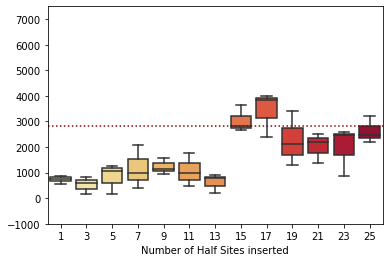

In [351]:
make_sns_boxplot(insert_site[1], "insert", "difference", "YlOrRd", "darkred", None, "q3_tea1_adh3_difference.pdf", "Number of Half Sites inserted", "", means[1], -1000,7500)


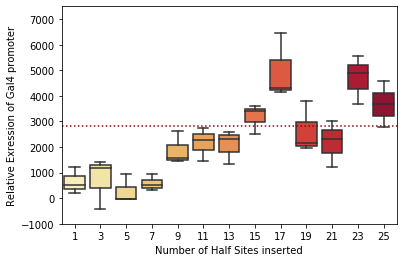

In [135]:
make_sns_boxplot(insert_site[0], "insert", "difference", "YlOrRd", "darkred", None, "q3_tea1_adh3_difference_box.pdf", "Number of Half Sites inserted", "Relative Exression of Gal4 promoter", wt_pr2["Expression"].mean(),-1000, 7500)



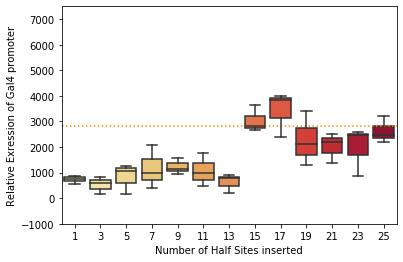

In [136]:
make_sns_boxplot(insert_site[1], "insert", "difference", "YlOrRd", "darkorange", None, "q3_tea1_adh3_difference_box.png", "Number of Half Sites inserted", "Relative Exression of Gal4 promoter", wt_pr2["Expression"].mean(), -1000, 7500)



In [352]:
num_CG_inserts = [1,5,9,13,17,21,25,1,5,9,13,17,21,25,1,5,9,13,17,21,25,]
insert_CG[0]["insert"] = num_CG_inserts
insert_CG[1]["insert"] = num_CG_inserts
insert_CG[2]["insert"] = num_CG_inserts
insert_CG[3]["insert"] = num_CG_inserts


insert_3mer[0]["insert"] = num_CG_inserts
insert_3mer[1]["insert"] = num_CG_inserts
insert_3mer[2]["insert"] = num_CG_inserts
insert_3mer[3]["insert"] = num_CG_inserts

#pr_ran3mer_q3["inserts"] = CG_inserts

/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [353]:
insert_CG[0]

,Sequence_type,Promoter,insert,Expression
335,insert_CG_control,TEA1_control_Isf1pr,1,1414
337,insert_CG_control,TEA1_control_Isf1pr,5,1653
339,insert_CG_control,TEA1_control_Isf1pr,9,1765
341,insert_CG_control,TEA1_control_Isf1pr,13,1874
343,insert_CG_control,TEA1_control_Isf1pr,17,2090
345,insert_CG_control,TEA1_control_Isf1pr,21,2173
347,insert_CG_control,TEA1_control_Isf1pr,25,2466
789,insert_CG_control,TEA1_control_Isf1pr,1,1414
791,insert_CG_control,TEA1_control_Isf1pr,5,2355
793,insert_CG_control,TEA1_control_Isf1pr,9,1561


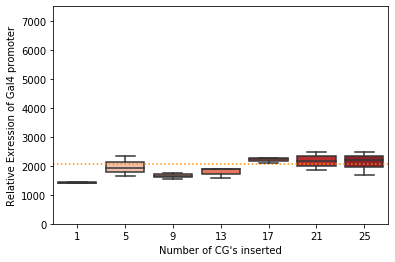

In [143]:
make_sns_boxplot(insert_CG[0], "insert", "Expression", "Reds", "darkorange", None, "q3_yrm1_hsv2_cgcontrol.pdf", "Number of CG's inserted", "Relative Exression of Gal4 promoter", means, 0,7500)



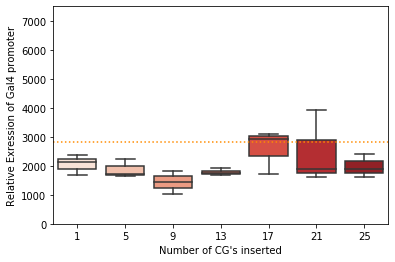

In [145]:
make_sns_boxplot(insert_CG[1], "insert", "Expression", "Reds", "darkorange", None, "q3_adh3_cgcontrol.pdf", "Number of CG's inserted", "Relative Exression of Gal4 promoter", wt_pr2["Expression"].mean(), 0,7500)



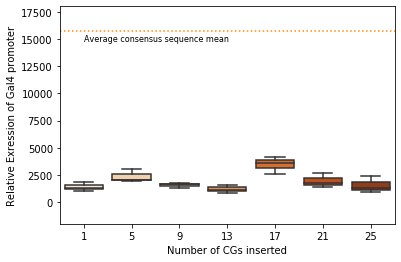

In [242]:
make_sns_boxplot(insert_CG[1], "insert", "Expression", "Oranges", "darkorange", None, "q3_gal1_10_cgcontrol_box.png", "Number of CGs inserted", "Relative Exression of Gal4 promoter", wt_pr2["Expression"].mean(), 18000)



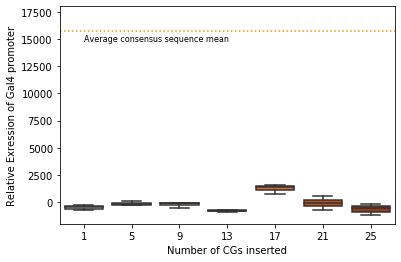

In [243]:
make_sns_boxplot(insert_CG[1], "insert", "difference", "Oranges", "darkorange", None, "q3_gal110_diff_box.png", "Number of CGs inserted", "Relative Exression of Gal4 promoter", wt_pr2["Expression"].mean(), 18000)



# Controls in the supplement

In [354]:
def compare_mut(df):
    """makes df for a specific number of CGG inserts"""
    compare_forcontrols = df.loc[(df["insert"] == 1)| (df["insert"] == 5)| (df["insert"] == 9)|(df["insert"] == 13)|(df["insert"] == 17)|(df["insert"] == 21)|(df["insert"] == 25)]
    return compare_forcontrols



In [355]:
pr1_compare = compare_mut(insert_site[0])
pr2_compare = compare_mut(insert_site[1])
pr3_compare = compare_mut(insert_site[2])
pr4_compare = compare_mut(insert_site[3])

In [323]:
insert_3mer[2]

,Sequence_type,Promoter,insert,Expression
434,insert_rand_3mer,YRM1_Spo24pr_control,1,2659.6980
438,insert_rand_3mer,YRM1_Spo24pr_control,5,2245.1860
442,insert_rand_3mer,YRM1_Spo24pr_control,9,1984.6710
446,insert_rand_3mer,YRM1_Spo24pr_control,13,2118.3730
450,insert_rand_3mer,YRM1_Spo24pr_control,17,1479.4600
454,insert_rand_3mer,YRM1_Spo24pr_control,21,2178.5340
458,insert_rand_3mer,YRM1_Spo24pr_control,25,1300.2780
962,insert_rand_3mer,YRM1_Spo24pr_control,1,2155.0820
966,insert_rand_3mer,YRM1_Spo24pr_control,5,2716.8300
970,insert_rand_3mer,YRM1_Spo24pr_control,9,1820.0390


In [356]:
pr1_compare_all = pd.concat([pr1_compare, insert_CG[0], insert_3mer[0]])
pr2_compare_all = pd.concat([pr2_compare, insert_CG[1], insert_3mer[1]])
pr3_compare_all = pd.concat([pr3_compare, insert_CG[2], insert_3mer[2]])
pr4_compare_all = pd.concat([pr4_compare, insert_CG[3], insert_3mer[3]])

/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass

In [359]:
pr1_compare_all

,Expression,Promoter,Sequence_type,difference,insert
309,1893,TEA1_control_Isf1pr,insert_site,1209.059743,1
313,1449,TEA1_control_Isf1pr,insert_site,-29.360161,5
317,2668,TEA1_control_Isf1pr,insert_site,1562.247461,9
321,4126,TEA1_control_Isf1pr,insert_site,2600.258083,13
325,6735,TEA1_control_Isf1pr,insert_site,4141.423198,17
...,...,...,...,...,...
1261,2249,TEA1_control_Isf1pr,insert_rand_3mer,NaN,9
1263,1840,TEA1_control_Isf1pr,insert_rand_3mer,NaN,13
1265,1313,TEA1_control_Isf1pr,insert_rand_3mer,NaN,17
1267,2419,TEA1_control_Isf1pr,insert_rand_3mer,NaN,21


In [258]:
means

[1305.9236666666668, 4281.083333333333, 5150.551666666667, 5451.026333333332]

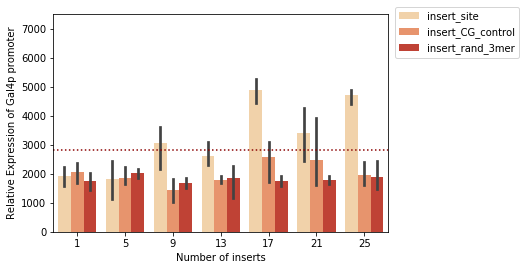

In [361]:
make_compare_plot(pr2_compare_all, "insert", "Expression", "OrRd", "darkred", "Sequence_type", means[1], "q3_controls_combined_tea1_adh3.pdf")



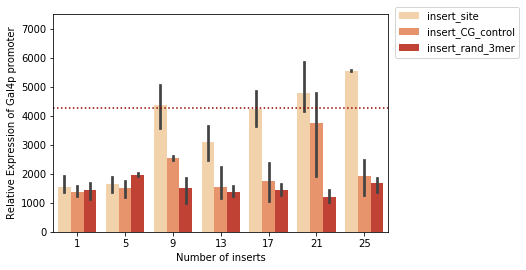

In [246]:
make_compare_plot(pr2_compare_all, "insert", "Expression", "OrRd", "darkred", "Sequence_type", means[1], "q3_controls_combined_yrm1_gip3_isu1_difference.pdf")

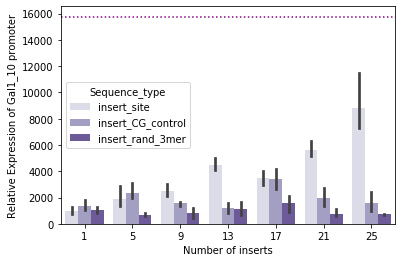

In [189]:
ax = sns.barplot(x= "insert", y= "Expression", data=pr2_compare_all, hue = "Sequence_type", palette = "Purples")
ax.set_xlabel("Number of inserts")
ax.set_ylabel("Relative Expression of Gal1_10 promoter")
plt.axhline(y = wt_pr2["Expression"].mean() , color = "purple", linestyle = ':')


#plt.savefig("q3_gal10_controls.png")

In [178]:
pr1_compare_all

,Sequence_type,Promoter,insert,Expression,difference
395,insert_site,RUP1/SFL1pr,1,1678.508866,-363.930204
403,insert_site,RUP1/SFL1pr,5,1861.821631,-12.444414
411,insert_site,RUP1/SFL1pr,9,1279.171007,-516.005526
419,insert_site,RUP1/SFL1pr,13,2440.115712,302.578326
427,insert_site,RUP1/SFL1pr,17,4513.924298,1367.226573
...,...,...,...,...,...
1623,insert_rand_3mer,RUP1/SFL1pr,9,1647.676708,171.776619
1627,insert_rand_3mer,RUP1/SFL1pr,13,516.086283,-943.002761
1631,insert_rand_3mer,RUP1/SFL1pr,17,1576.464511,-175.290851
1635,insert_rand_3mer,RUP1/SFL1pr,21,673.030458,-720.559758
